# 와인가격 예측 모델
- 가지수, 데이터양
- 11가지 항목 독립변수, 와인 품질 종속변수
- 회귀분석

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')

In [7]:
red.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
white.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [17]:
rw = pd.concat([red, white])
rw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [19]:
rw.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

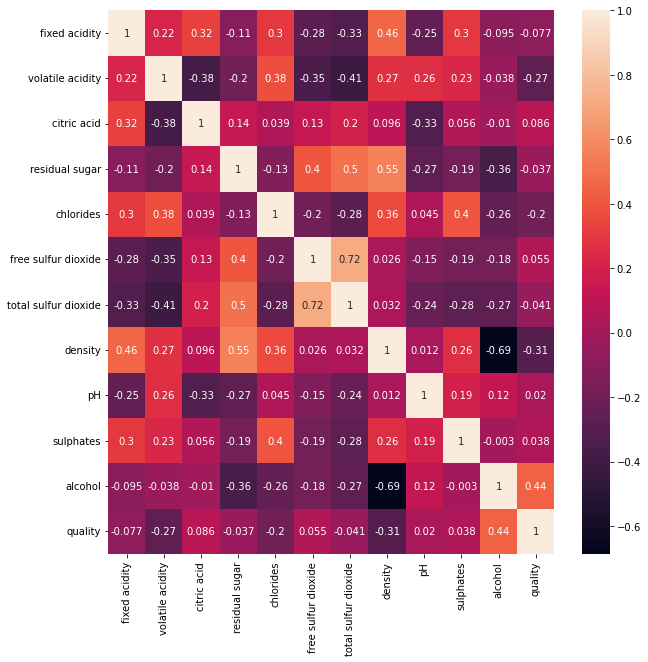

In [24]:
rw_corr = rw.corr()
plt.figure(figsize=(10,10))
sns.heatmap(rw_corr, annot=True)

In [27]:
X = rw[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
Y = rw[["quality"]]

In [28]:
vif = pd.DataFrame()
vif['X'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.round(1)

,X,vif
0,fixed acidity,58.9
1,volatile acidity,8.9
2,citric acid,9.3
3,residual sugar,3.6
4,chlorides,5.6
5,free sulfur dioxide,8.5
6,total sulfur dioxide,14.7
7,density,937.0
8,pH,589.0
9,sulphates,18.5


In [ ]:
# vif가 가장 큰 변수 하나씩 지움 (vif < 10 될때까지)

In [29]:
X1= rw[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","pH","sulphates","alcohol"]]

In [30]:
vif = pd.DataFrame()
vif['X1'] = X1.columns
vif['vif'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif.round(1)

,X1,vif
0,fixed acidity,41.5
1,volatile acidity,8.9
2,citric acid,9.3
3,residual sugar,3.3
4,chlorides,5.4
5,free sulfur dioxide,8.4
6,total sulfur dioxide,13.4
7,pH,142.6
8,sulphates,18.2
9,alcohol,88.5


In [31]:
X2= rw[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","sulphates","alcohol"]]

In [32]:
vif = pd.DataFrame()
vif['X2'] = X2.columns
vif['vif'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif.round(1)

,X2,vif
0,fixed acidity,38.6
1,volatile acidity,8.5
2,citric acid,9.1
3,residual sugar,3.2
4,chlorides,5.2
5,free sulfur dioxide,8.4
6,total sulfur dioxide,12.3
7,sulphates,17.2
8,alcohol,30.9


In [33]:
X3 = rw[["volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","sulphates","alcohol"]]

In [34]:
vif = pd.DataFrame()
vif['X3'] = X3.columns
vif['vif'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif.round(1)

,X3,vif
0,volatile acidity,7.7
1,citric acid,7.2
2,residual sugar,3.2
3,chlorides,5.1
4,free sulfur dioxide,8.4
5,total sulfur dioxide,12.3
6,sulphates,16.2
7,alcohol,22.9


In [ ]:
"""
알콜은 퀄리티와 밀접한 상관이 있어보이므로 알콜을 제외한 다른 변수들을 제거 후 
추후 결과가 좋지않을경우 삭제할 예정
"""

In [35]:
X4 = rw[["volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","alcohol"]]

In [36]:
vif = pd.DataFrame()
vif['X4'] = X4.columns
vif['vif'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif.round(1)

,X4,vif
0,volatile acidity,7.5
1,citric acid,7.1
2,residual sugar,3.2
3,chlorides,4.4
4,free sulfur dioxide,8.4
5,total sulfur dioxide,12.2
6,alcohol,16.8


In [38]:
X5 = rw[["volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","alcohol"]]

In [39]:
vif = pd.DataFrame()
vif['X5'] = X5.columns
vif['vif'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif.round(1)

,X5,vif
0,volatile acidity,7.5
1,citric acid,7.0
2,residual sugar,2.8
3,chlorides,4.4
4,free sulfur dioxide,4.9
5,alcohol,15.8


In [50]:
lg = LogisticRegression()

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X5, Y, test_size = 0.2, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 42)

lg.fit(X_train, Y_train)
lg_pre = lg.predict(X_val)
lg.score(X_val, Y_val)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5330769230769231

In [ ]:
# 표준화

In [60]:
SS = StandardScaler()

In [80]:
X_ss = SS.fit_transform(X5)
Y_ss = SS.fit_transform(Y)
Y_ss = Y_ss.astype(int)

X_train_ss, X_test_ss, Y_train_ss, Y_test_ss = train_test_split(X_ss, Y_ss, test_size = 0.2, random_state = 6)
X_train_ss, X_val_ss, Y_train_ss, Y_val_ss = train_test_split(X_train_ss, Y_train_ss, test_size = 0.25, random_state = 6)

lg.fit(X_train_ss, Y_train_ss)
lg_pre = lg.predict(X_val_ss)
lg.score(X_val_ss, Y_val_ss)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7823076923076923

In [ ]:
# 가장 vif가 큰 변수 3개 지움

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size = 0.2, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 42)

lg.fit(X_train, Y_train)
lg_pre = lg.predict(X_val)
lg.score(X_val, Y_val)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4530769230769231

In [68]:
X_ss = SS.fit_transform(X3)
Y_ss = SS.fit_transform(Y)
Y_ss = Y_ss.astype(int)

X_train_ss, X_test_ss, Y_train_ss, Y_test_ss = train_test_split(X_ss, Y_ss, test_size = 0.2, random_state = 42)
X_train_ss, X_val_ss, Y_train_ss, Y_val_ss = train_test_split(X_train_ss, Y_train_ss, test_size = 0.25, random_state = 42)

lg.fit(X_train_ss, Y_train_ss)
lg_pre = lg.predict(X_val_ss)
lg.score(X_val_ss, Y_val_ss)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7515384615384615